<a href="https://colab.research.google.com/github/hongqin/Python-CoLab-bootcamp/blob/master/Learn_Python_by_analying_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python to analyze the Covid19 data
Hong Qin

Video at https://youtu.be/1JDP4o92tss 

These materials are for education only.


In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
### Import libraries
import pandas as pd # primary data structure library

# Part1. Get JHU COVID19 Data into Python

This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [4]:

### Select data path
#fullpath1= '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

fullpath1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
df1 = pd.read_csv(fullpath1, error_bad_lines=False)

#fullpath2 = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
fullpath2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df2 = pd.read_csv(fullpath2, error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


## DataFrame is Python Pandas word for Excel spreadsheet

# Part 2. Explore USA time series by counties

In [5]:
df1.shape

(3342, 1017)

view the dataframe

In [6]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,18452,18452,18452,18452,18452,18452,18480,18480,18480,18480
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,65819,65819,65819,65819,65819,65819,65895,65895,65895,65895
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6910,6910,6910,6910,6910,6910,6926,6926,6926,6926
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,7547,7547,7547,7547,7547,7547,7560,7560,7560,7560
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,17256,17256,17256,17256,17256,17256,17286,17286,17286,17286


How to find out the columns?

In [7]:
#dir(df1)

In [8]:
df1.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '10/14/22', '10/15/22', '10/16/22', '10/17/22', '10/18/22', '10/19/22',
       '10/20/22', '10/21/22', '10/22/22', '10/23/22'],
      dtype='object', length=1017)

In [9]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,11771,11771,11771,11771,11800,11800,11800,11800,11800,11800
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,6163,6163,6163,6163,6176,6176,6176,6176,6176,6176
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2669,2669,2669,2669,2669,2669,2669,2669,2669,2669
3341,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,1818,1818,1818,1818,1821,1821,1821,1821,1821,1821


In [10]:
df1

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,18452,18452,18452,18452,18452,18452,18480,18480,18480,18480
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,65819,65819,65819,65819,65819,65819,65895,65895,65895,65895
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6910,6910,6910,6910,6910,6910,6926,6926,6926,6926
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,7547,7547,7547,7547,7547,7547,7560,7560,7560,7560
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,17256,17256,17256,17256,17256,17256,17286,17286,17286,17286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,11771,11771,11771,11771,11800,11800,11800,11800,11800,11800
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,6163,6163,6163,6163,6176,6176,6176,6176,6176,6176
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2669,2669,2669,2669,2669,2669,2669,2669,2669,2669


In [11]:
df1['Lat'][3337:3339]

3337    43.935225
3338    41.287818
Name: Lat, dtype: float64

In [12]:
df1.iloc[3337:3340, 8:11] #be aware that Python is typically end-exclusive! 

,Lat,Long_,Combined_Key
3337,43.935225,-110.589080,"Teton, Wyoming, US"
3338,41.287818,-110.547578,"Uinta, Wyoming, US"
3339,0.000000,0.000000,"Unassigned, Wyoming, US"


How to find out dataframe dimensions

In [13]:
print ('dataframe dimensions:', df1.shape)

dataframe dimensions: (3342, 1017)


How many "province states" are there in this data set?

In [14]:
df1.Province_State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [15]:
len(df1.Province_State.unique())

58

### Q, what is the larged case value in this data set? 

In [16]:
df1.iloc[:, 11:].max().max()

3476928

In [17]:
df1.idxmax

<bound method DataFrame.idxmax of            UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3337  84056039   US  USA    840  56039.0       Teton        Wyoming   
3338  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3339  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3340  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3341  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 10/14/22  10/15/22  10/16/22  \
0                US  32.539527  -

Find out which row has the largest value for column '10/18/22'

In [18]:
df1["10/18/22"].max()

3472418

## Find out which row has the largest value. 

In [19]:
df1.loc[df1['10/18/22']>=3472418]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
215,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,...,3470848,3470848,3470848,3472418,3472418,3474708,3475930,3476928,3476928,3476928


## plot
Because pandas do plot by columns, JHU data set put time series by row. So, we have to transpose the JHU dataframe. 

In [20]:
LA = df1.iloc[215, 11:]
type(LA)

pandas.core.series.Series

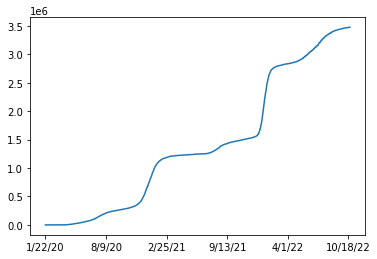

In [21]:
#print(LA)
LA.plot()

In [22]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,18452,18452,18452,18452,18452,18452,18480,18480,18480,18480
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,65819,65819,65819,65819,65819,65819,65895,65895,65895,65895
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6910,6910,6910,6910,6910,6910,6926,6926,6926,6926
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,7547,7547,7547,7547,7547,7547,7560,7560,7560,7560
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,17256,17256,17256,17256,17256,17256,17286,17286,17286,17286


In [23]:
df1.iloc[:, 11:].head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
0,0,0,0,0,0,0,0,0,0,0,...,18452,18452,18452,18452,18452,18452,18480,18480,18480,18480
1,0,0,0,0,0,0,0,0,0,0,...,65819,65819,65819,65819,65819,65819,65895,65895,65895,65895
2,0,0,0,0,0,0,0,0,0,0,...,6910,6910,6910,6910,6910,6910,6926,6926,6926,6926
3,0,0,0,0,0,0,0,0,0,0,...,7547,7547,7547,7547,7547,7547,7560,7560,7560,7560
4,0,0,0,0,0,0,0,0,0,0,...,17256,17256,17256,17256,17256,17256,17286,17286,17286,17286


In [24]:
UScases = df1.iloc[0:3, 11:].transpose() 
UScases.shape
UScases

,0,1,2
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
10/19/22,18452,65819,6910
10/20/22,18480,65895,6926
10/21/22,18480,65895,6926
10/22/22,18480,65895,6926


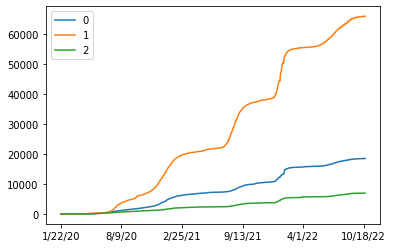

In [25]:
UScases.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f378edf7790>,
      dtype=object)

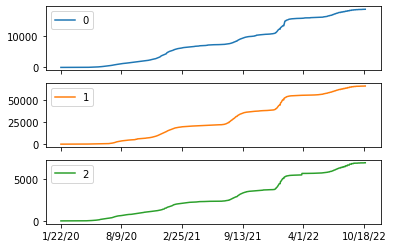

In [26]:
UScases.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f378ecb1590>,
      dtype=object)

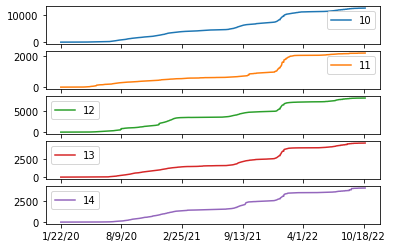

In [27]:
df1.iloc[10:15, 11:].transpose().plot(subplots=True)

## Add meaningful index to the dataframe

In [28]:
# one way is to load csv with index 
df1 = pd.read_csv(fullpath1, error_bad_lines=False, index_col=10) #10th index picks 11th column of "Combined_Key"
df1.reset_index(drop=True)
df1.index

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Autauga, Alabama, US', 'Baldwin, Alabama, US', 'Barbour, Alabama, US',
       'Bibb, Alabama, US', 'Blount, Alabama, US', 'Bullock, Alabama, US',
       'Butler, Alabama, US', 'Calhoun, Alabama, US', 'Chambers, Alabama, US',
       'Cherokee, Alabama, US',
       ...
       'Park, Wyoming, US', 'Platte, Wyoming, US', 'Sheridan, Wyoming, US',
       'Sublette, Wyoming, US', 'Sweetwater, Wyoming, US',
       'Teton, Wyoming, US', 'Uinta, Wyoming, US', 'Unassigned, Wyoming, US',
       'Washakie, Wyoming, US', 'Weston, Wyoming, US'],
      dtype='object', name='Combined_Key', length=3342)

In [29]:
df1.iloc[:,11:].transpose().head()

Combined_Key,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",...,"Park, Wyoming, US","Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US"
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# another way is to re-assign index
df1 = pd.read_csv(fullpath1, error_bad_lines=False)
newrows = list( df1['Combined_Key'])
df1.index =  newrows
df1.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


(3342, 1017)

In [31]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,18452,18452,18452,18452,18452,18452,18480,18480,18480,18480
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,65819,65819,65819,65819,65819,65819,65895,65895,65895,65895
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6910,6910,6910,6910,6910,6910,6926,6926,6926,6926
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,7547,7547,7547,7547,7547,7547,7560,7560,7560,7560
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,17256,17256,17256,17256,17256,17256,17286,17286,17286,17286


In [32]:
list(df1['Combined_Key'] )[1:10]

['Baldwin, Alabama, US',
 'Barbour, Alabama, US',
 'Bibb, Alabama, US',
 'Blount, Alabama, US',
 'Bullock, Alabama, US',
 'Butler, Alabama, US',
 'Calhoun, Alabama, US',
 'Chambers, Alabama, US',
 'Cherokee, Alabama, US']

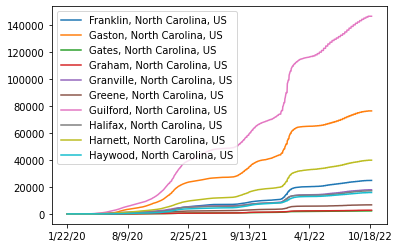

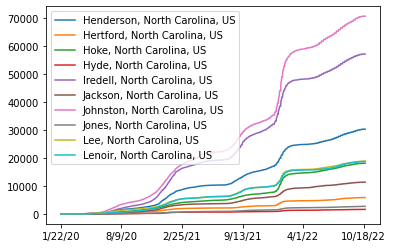

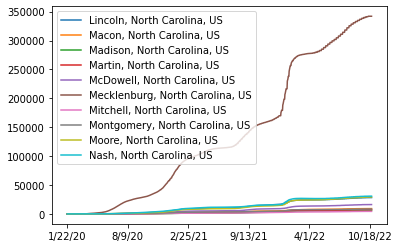

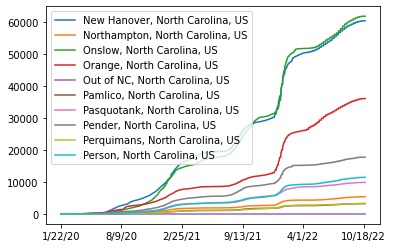

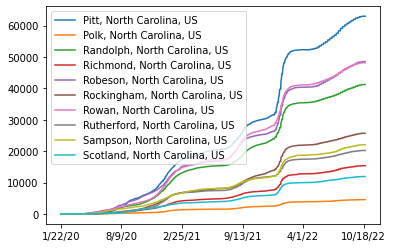

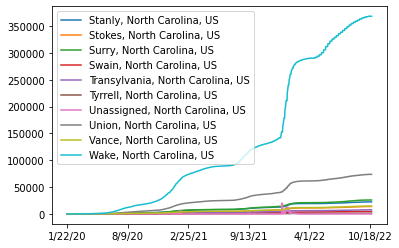

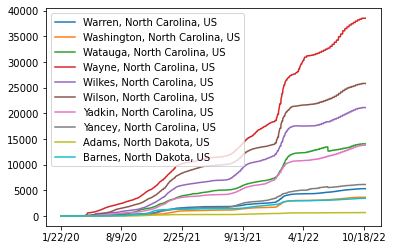

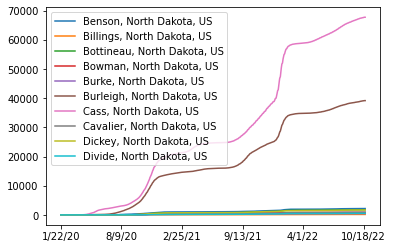

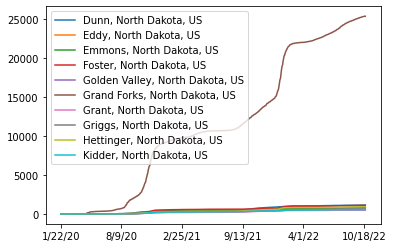

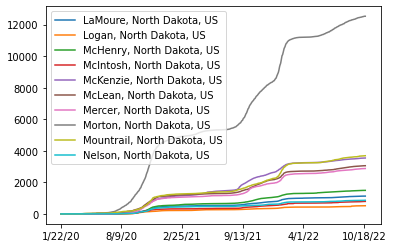

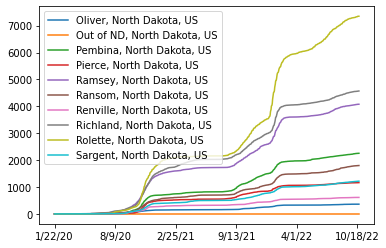

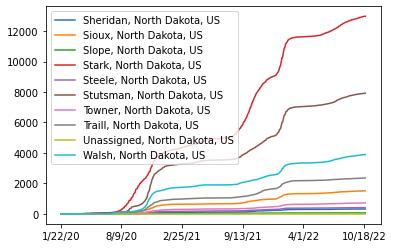

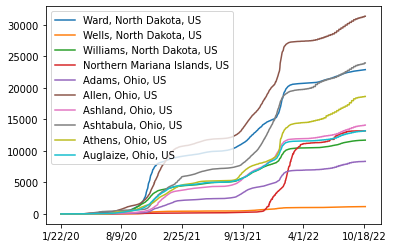

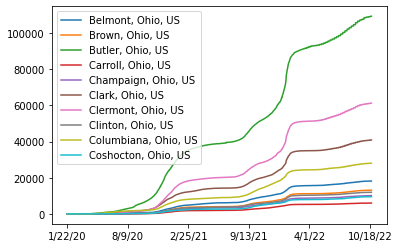

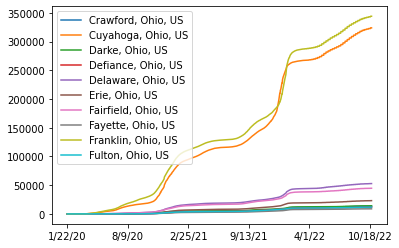

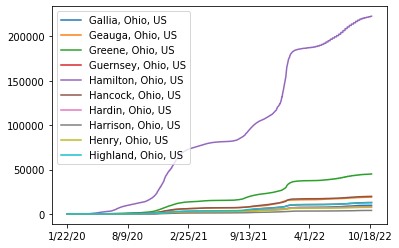

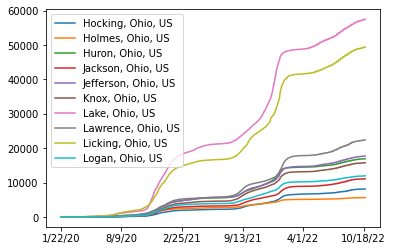

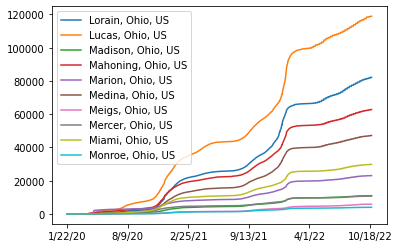

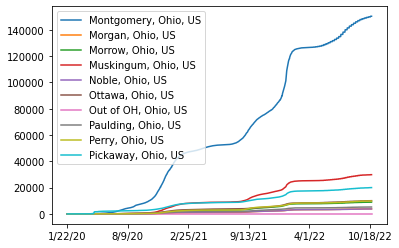

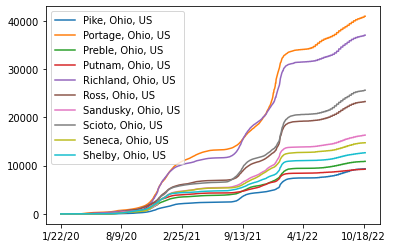

In [33]:
step = 10
for i in range(2000, 2200, step):
#for i in range(0, 3340, step):
  UScases = df1.iloc[ i : (i+step), 11:].transpose().plot()

In [34]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
"Teton, Wyoming, US",84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,11771,11771,11771,11771,11800,11800,11800,11800,11800,11800
"Uinta, Wyoming, US",84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,6163,6163,6163,6163,6176,6176,6176,6176,6176,6176
"Unassigned, Wyoming, US",84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
"Washakie, Wyoming, US",84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2669,2669,2669,2669,2669,2669,2669,2669,2669,2669
"Weston, Wyoming, US",84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,1818,1818,1818,1818,1821,1821,1821,1821,1821,1821


## Note. It turns out that there are unassigned cases in some states, such as Wyoming. Thse unassigned cases become zero when they are settled. 

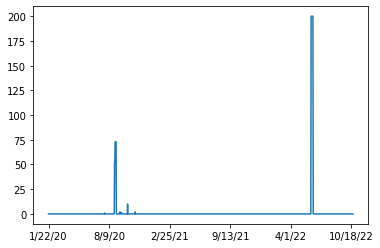

In [35]:
df1.loc['Unassigned, Wyoming, US', ][11:].plot()

In [36]:
df1.loc[ df1.index.str.contains('Unassigned'), ].shape

(52, 1017)

Quetions: Why are there 52 unassigned rows? 

In [37]:

df1.loc[ df1.index.str.contains('Unassigned'), ]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
"Unassigned, Alabama, US",84090001,US,USA,840,90001.0,Unassigned,Alabama,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
"Unassigned, Alaska, US",84090002,US,USA,840,90002.0,Unassigned,Alaska,US,0.0,0.0,...,1824,1824,1824,1824,1824,1825,1825,1825,1825,1825
"Unassigned, Arizona, US",84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
"Unassigned, Arkansas, US",84090005,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,...,31404,31413,31420,31428,31436,31458,31464,31470,31481,31486
"Unassigned, California, US",84090006,US,USA,840,90006.0,Unassigned,California,US,0.0,0.0,...,4435,4435,4435,4435,4435,4435,4372,4370,4370,4370
"Unassigned, Colorado, US",84090008,US,USA,840,90008.0,Unassigned,Colorado,US,0.0,0.0,...,179,179,179,179,180,181,184,184,184,184
"Unassigned, Connecticut, US",84090009,US,USA,840,90009.0,Unassigned,Connecticut,US,0.0,0.0,...,2947,2950,2944,2953,2952,2955,2963,2952,2962,2962
"Unassigned, Delaware, US",84090010,US,USA,840,90010.0,Unassigned,Delaware,US,0.0,0.0,...,1200,1200,1200,1213,1090,1090,1090,1091,1091,1091
"Unassigned, District of Columbia, US",84090011,US,USA,840,90011.0,Unassigned,District of Columbia,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
"Unassigned, Florida, US",84090012,US,USA,840,90012.0,Unassigned,Florida,US,0.0,0.0,...,3258,3258,3258,3258,3258,3258,3258,3259,3259,3259


Challenge and Question: Write a one-line code to plot all of the 'unassigned' rows.

In [38]:
# df1.loc[df1.index.str.contains('Unassigned'), ].plot() #No, this is not working properly

In [39]:
# df1.loc[df1.index.str.contains("Unsassigned"),11:].plot() #error 

In [40]:
# df1.loc[df1.index.str.contains("Unassigned")][11:].plot() #wrong plot

In [41]:
#df1.loc[df1.index.str.contains('Unassigned'), :][:,11:]

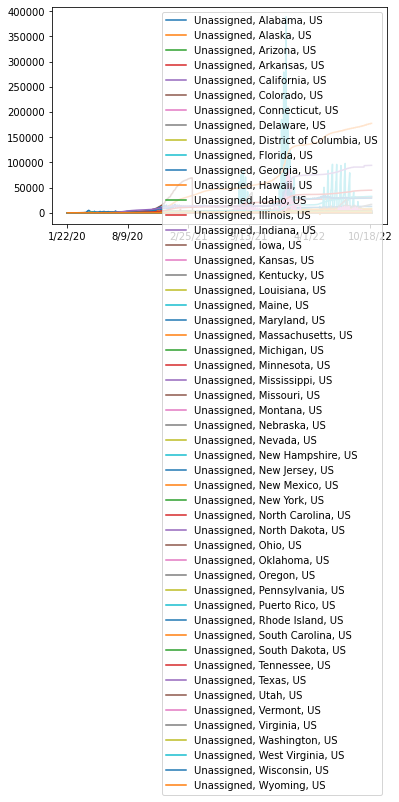

In [42]:
unassigned_df = df1.loc[df1.index.str.contains('Unassigned')]
unassigned_df.iloc[ :, 11:].shape
unassigned_df.iloc[ :, 11:].transpose().plot()

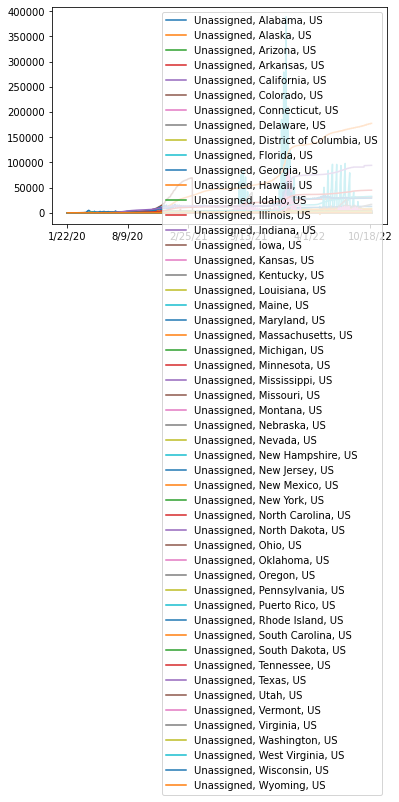

In [43]:
df1.loc[df1.index.str.contains('Unassigned')].iloc[:, 11:].transpose().plot() # Well done, an one-line solution! 

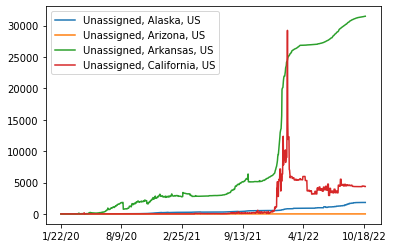

In [44]:
df1.loc[df1.index.str.contains('Unassigned')].iloc[ :, 11:].transpose().iloc[:,1:5].plot() #subsetting for clarity

## How about the cases at the Hamilton county, TN? 

In [77]:
# Can we examine cumualted cases at the Hamilton County, TN? 


df1.loc[df1['Combined_Key'] == 'Bronx, New York, US']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
"Bronx, New York, US",84036005,US,USA,840,36005.0,Bronx,New York,US,40.852093,-73.862828,...,491633,491633,491633,493038,493278,493471,493864,494262,494262,494262


In [78]:
dfHamilton = df1[df1.Combined_Key == "Bronx, New York, US"]
dfHamilton

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
"Bronx, New York, US",84036005,US,USA,840,36005.0,Bronx,New York,US,40.852093,-73.862828,...,491633,491633,491633,493038,493278,493471,493864,494262,494262,494262


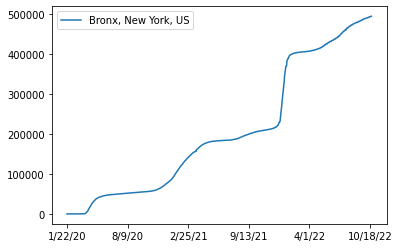

In [79]:
df1.loc[df1['Combined_Key'] == 'Bronx, New York, US'].iloc[:, 11:].transpose().plot()

# Part 3. Daily cases at Hamilton County
## Examine the daily confirmed cases in Hamilton County, TN

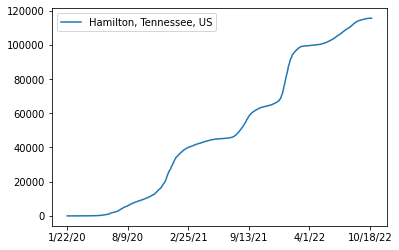

In [48]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

In [80]:
df_county = df1.loc[df1['Combined_Key'] == 'Bronx, New York, US'].iloc[:, 11:]

type(df_county)
df_county.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
"Bronx, New York, US",0,0,0,0,0,0,0,0,0,0,...,491633,491633,491633,493038,493278,493471,493864,494262,494262,494262


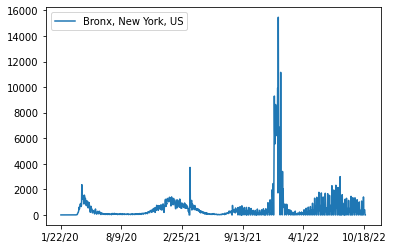

In [81]:
df_county.transpose().diff(axis=0).plot()

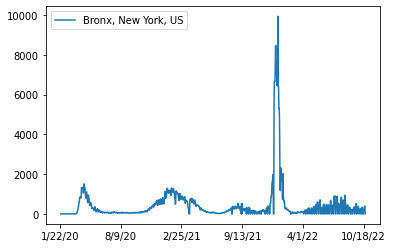

In [82]:
df_county.transpose().diff(axis=0).rolling(window=3).median().plot()

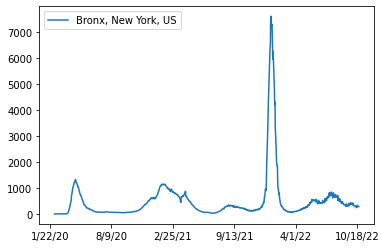

In [83]:
df_county.transpose().diff(axis=0).rolling(window=15).mean().plot()

#Part 4. Overlay Google Mobility estimate with daily COVID-19 cases. 

https://www.google.com/covid19/mobility/

## Use magjic commands to download data

In [52]:
! wget https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip 

--2022-10-24 22:09:16--  https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip
Resolving www.gstatic.com (www.gstatic.com)... 142.251.163.94, 2607:f8b0:4004:c1b::5e
Connecting to www.gstatic.com (www.gstatic.com)|142.251.163.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98167694 (94M) [application/zip]
Saving to: ‘Region_Mobility_Report_CSVs.zip’

Region_Mobility_Rep 100%[===================>]  93.62M  8.59MB/s    in 11s     

2022-10-24 22:09:27 (8.55 MB/s) - ‘Region_Mobility_Report_CSVs.zip’ saved [98167694/98167694]



In [53]:
! unzip /content/Region_Mobility_Report_CSVs.zip

Archive:  /content/Region_Mobility_Report_CSVs.zip
  inflating: 2020_AE_Region_Mobility_Report.csv  
  inflating: 2020_AF_Region_Mobility_Report.csv  
  inflating: 2020_AG_Region_Mobility_Report.csv  
  inflating: 2020_AO_Region_Mobility_Report.csv  
  inflating: 2020_AR_Region_Mobility_Report.csv  
  inflating: 2020_AT_Region_Mobility_Report.csv  
  inflating: 2020_AU_Region_Mobility_Report.csv  
  inflating: 2020_AW_Region_Mobility_Report.csv  
  inflating: 2020_BA_Region_Mobility_Report.csv  
  inflating: 2020_BB_Region_Mobility_Report.csv  
  inflating: 2020_BD_Region_Mobility_Report.csv  
  inflating: 2020_BE_Region_Mobility_Report.csv  
  inflating: 2020_BF_Region_Mobility_Report.csv  
  inflating: 2020_BG_Region_Mobility_Report.csv  
  inflating: 2020_BH_Region_Mobility_Report.csv  
  inflating: 2020_BJ_Region_Mobility_Report.csv  
  inflating: 2020_BO_Region_Mobility_Report.csv  
  inflating: 2020_BR_Region_Mobility_Report.csv  
  inflating: 2020_BS_Region_Mobility_Report.csv  

In [53]:
! ls *US*csv

2020_US_Region_Mobility_Report.csv  2022_US_Region_Mobility_Report.csv
2021_US_Region_Mobility_Report.csv


## Read csv into pandas dataframe, and merge them

In [54]:
df_US20 = pd.read_csv( "2020_US_Region_Mobility_Report.csv")
df_US21 = pd.read_csv( "2021_US_Region_Mobility_Report.csv")
df_US22 = pd.read_csv( "2022_US_Region_Mobility_Report.csv")

In [55]:
df_US = pd.concat( [df_US20, df_US21, df_US22] )
df_US.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [56]:
df_US.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
747964,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-10-10,NaN,NaN,NaN,NaN,-26.0,NaN
747965,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-10-11,NaN,NaN,NaN,NaN,-20.0,NaN
747966,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-10-12,NaN,NaN,NaN,NaN,-17.0,NaN
747967,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-10-13,NaN,NaN,NaN,NaN,-15.0,NaN
747968,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-10-14,NaN,NaN,NaN,NaN,-8.0,NaN


## convert date into objects

In [65]:
df_US.index = pd.to_datetime(df_US.date)
df_US.index

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24',
               ...
               '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06',
               '2022-10-07', '2022-10-10', '2022-10-11', '2022-10-12',
               '2022-10-13', '2022-10-14'],
              dtype='datetime64[ns]', name='date', length=2511994, freq=None)

## Pick a speciric County of a state

### Example of Hamilton TN moblility

In [84]:
#df_US.loc[ df_US.sub_region_1=='Tennessee'  ]

df_county_GM = df_US.loc[ ( df_US.sub_region_1=='New York' ) & (df_US.sub_region_2=='Bronx County') ]
df_county_GM.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,,
2022-10-11,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2022-10-11,-25.0,-16.0,-24.0,-28.0,-29.0,4.0
2022-10-12,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2022-10-12,-27.0,-18.0,-23.0,-29.0,-30.0,3.0
2022-10-13,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2022-10-13,-33.0,-21.0,-40.0,-32.0,-30.0,5.0
2022-10-14,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2022-10-14,-25.0,-14.0,-21.0,-27.0,-28.0,4.0
2022-10-15,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2022-10-15,-24.0,-20.0,6.0,-19.0,-21.0,0.0


## Daily COVID at this specific county

In [85]:
df_county_COVID = df1.loc[df1['Combined_Key'] == 'Bronx, New York, US'].iloc[:, 11:].transpose().diff(axis=0).rolling(window=7).mean()
#df_county_COVID = df1.loc[df1['Combined_Key'] == 'Harris, Texas, US'].iloc[:, 11:].transpose().diff(axis=0)

type(df_county_COVID)
df_county_COVID.tail()

,"Bronx, New York, US"
10/19/22,310.285714
10/20/22,318.714286
10/21/22,375.571429
10/22/22,375.571429
10/23/22,375.571429


In [86]:
df_county_COVID.index = pd.to_datetime(df_county_COVID.index)
#df_county_COVID.rename(columns={0:"daily_cases"}, inplace=True)
df_county_COVID.columns=["daily_cases"]
df_county_COVID.tail()

,daily_cases
2022-10-19,310.285714
2022-10-20,318.714286
2022-10-21,375.571429
2022-10-22,375.571429
2022-10-23,375.571429


### Merge mobiligy with COVID data for Hamilton, TN

In [87]:
df_county_COVID

,daily_cases
2020-01-22,NaN
2020-01-23,NaN
2020-01-24,NaN
2020-01-25,NaN
2020-01-26,NaN
...,...
2022-10-19,310.285714
2022-10-20,318.714286
2022-10-21,375.571429
2022-10-22,375.571429


In [88]:
df_county_GM

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,,
2020-02-15,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2020-02-15,0.0,-8.0,-5.0,-3.0,0.0,1.0
2020-02-16,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2020-02-16,-1.0,-4.0,5.0,-2.0,-2.0,0.0
2020-02-17,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2020-02-17,3.0,-8.0,-11.0,-22.0,-38.0,10.0
2020-02-18,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2020-02-18,-2.0,-6.0,-11.0,-7.0,-10.0,3.0
2020-02-19,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2020-02-19,2.0,-6.0,0.0,-6.0,-9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-11,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2022-10-11,-25.0,-16.0,-24.0,-28.0,-29.0,4.0
2022-10-12,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2022-10-12,-27.0,-18.0,-23.0,-29.0,-30.0,3.0
2022-10-13,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2022-10-13,-33.0,-21.0,-40.0,-32.0,-30.0,5.0


In [89]:
df_county = pd.merge(df_county_COVID, df_county_GM, left_index=True, right_index=True)
df_county.tail()

,daily_cases,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2022-10-11,274.000000,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2022-10-11,-25.0,-16.0,-24.0,-28.0,-29.0,4.0
2022-10-12,270.285714,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2022-10-12,-27.0,-18.0,-23.0,-29.0,-30.0,3.0
2022-10-13,265.142857,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2022-10-13,-33.0,-21.0,-40.0,-32.0,-30.0,5.0
2022-10-14,227.428571,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2022-10-14,-25.0,-14.0,-21.0,-27.0,-28.0,4.0
2022-10-15,227.428571,US,United States,New York,Bronx County,NaN,NaN,36005.0,ChIJBUEf6ovgwokRwlazSIxIpsk,2022-10-15,-24.0,-20.0,6.0,-19.0,-21.0,0.0


## Plot

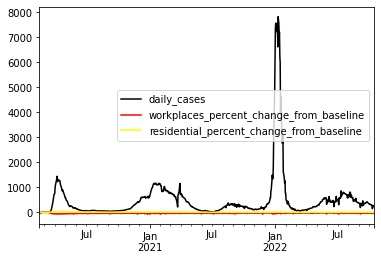

In [94]:
df_county[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']].plot(color=["black", "red", "yellow"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f378e769a90>,
      dtype=object)

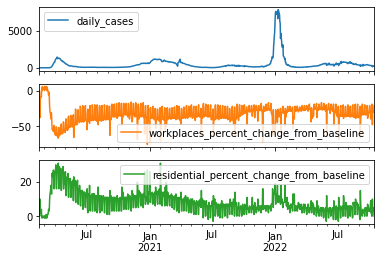

In [91]:
df_county[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']].plot(subplots=True)

### Plot with normalized data and moving windows

Using Z-score to normalize data for overlays. See https://en.wikipedia.org/wiki/Standard_score 

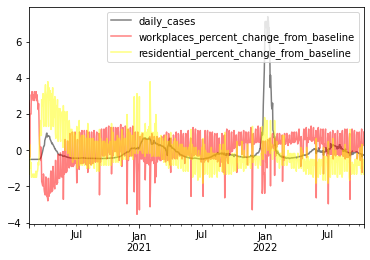

In [97]:
df_county2 = df_county[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]

df_county2 = ( df_county2 - df_county2.mean() ) / df_county2.std() 

df_county2.loc['2020-02-01':'2022-10-15', ].plot(color=["black", "red", "yellow"], alpha=0.5)

 Try to remove the weekly fluctuation by 15-day moving window

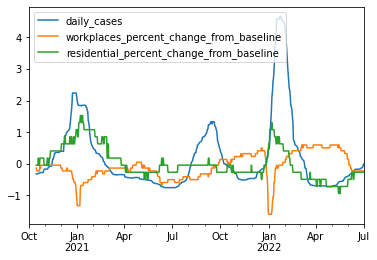

In [76]:
df_county2.loc['2020-10-01':'2022-07-01', ].rolling(window=15).median().plot()

# Part 5. Examine the cases by States.

In [66]:

df1.loc[ :, 'Province_State']

Autauga, Alabama, US       Alabama
Baldwin, Alabama, US       Alabama
Barbour, Alabama, US       Alabama
Bibb, Alabama, US          Alabama
Blount, Alabama, US        Alabama
                            ...   
Teton, Wyoming, US         Wyoming
Uinta, Wyoming, US         Wyoming
Unassigned, Wyoming, US    Wyoming
Washakie, Wyoming, US      Wyoming
Weston, Wyoming, US        Wyoming
Name: Province_State, Length: 3342, dtype: object

In [67]:
groupby_state = df1.iloc[:,11:].groupby(df1['Province_State'])
type( groupby_state )

pandas.core.groupby.generic.DataFrameGroupBy

In [68]:
df_by_state = groupby_state.sum()
type( df_by_state )

pandas.core.frame.DataFrame

In [69]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1528739,1528739,1528739,1528739,1528739,1528739,1531305,1531305,1531305,1531305
Alaska,0,0,0,0,0,0,0,0,0,0,...,299434,299434,299434,299434,299434,299790,299790,299790,299790,299790
American Samoa,0,0,0,0,0,0,0,0,0,0,...,8251,8251,8251,8251,8251,8251,8251,8251,8251,8251
Arizona,0,0,0,0,1,1,1,1,1,1,...,2277635,2277635,2277635,2277635,2277635,2283073,2283073,2283073,2283073,2283073
Arkansas,0,0,0,0,0,0,0,0,0,0,...,955518,955798,955956,956033,956424,956857,957218,957541,957818,957914


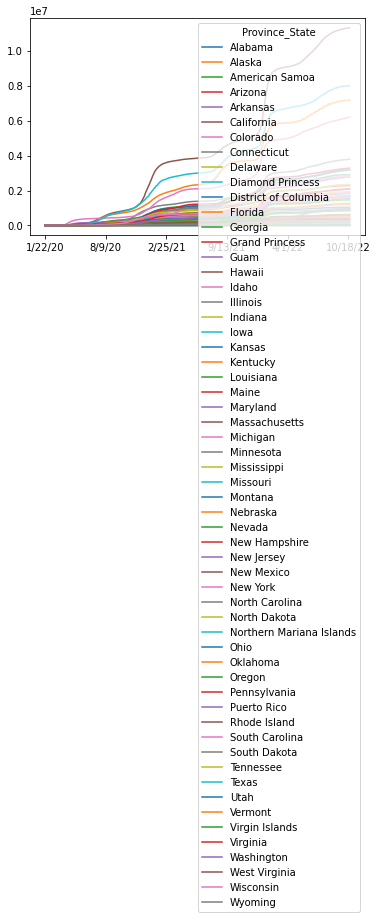

In [70]:
df_by_state.transpose().plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0b4594a50>,
      dtype=object)

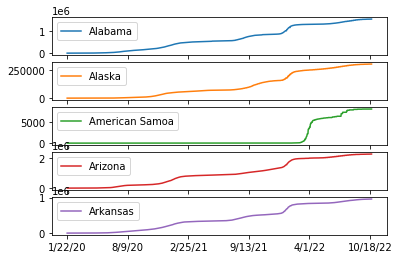

In [71]:
df_by_state.transpose().iloc[:,0:5].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0b4521810>],
      dtype=object)

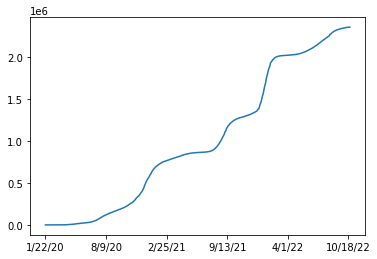

In [72]:
df_by_state.transpose().loc[:,"Tennessee"].plot(subplots=True)

In [73]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1528739,1528739,1528739,1528739,1528739,1528739,1531305,1531305,1531305,1531305
Alaska,0,0,0,0,0,0,0,0,0,0,...,299434,299434,299434,299434,299434,299790,299790,299790,299790,299790
American Samoa,0,0,0,0,0,0,0,0,0,0,...,8251,8251,8251,8251,8251,8251,8251,8251,8251,8251
Arizona,0,0,0,0,1,1,1,1,1,1,...,2277635,2277635,2277635,2277635,2277635,2283073,2283073,2283073,2283073,2283073
Arkansas,0,0,0,0,0,0,0,0,0,0,...,955518,955798,955956,956033,956424,956857,957218,957541,957818,957914


In [74]:
# df_by_state.loc['Tennessee'][11:].transpose().plot() #This is bit problematic on the columns

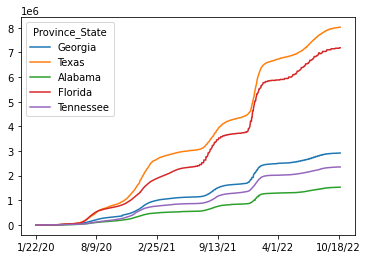

In [75]:
df_by_state.loc[['Georgia', 'Texas', 'Alabama', 'Florida', 'Tennessee']].transpose().plot() #Here, Texas and Tennessee are row-index

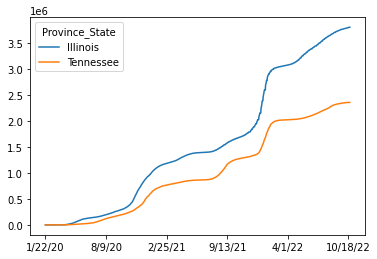

In [76]:
df_by_state.transpose()[['Illinois', 'Tennessee']].plot() #Here, Texas ans Tennessee are columns

## How to examine the new cases daily? 

### diff() on a test dataframe

In [77]:
dataset = [(2, 4, 6, 8),
           (10, 12, 14, 18),
           (20, 22, 24, 26),
           (28, 30, 32, 34)];

df_test = pd.DataFrame(dataset, columns = ("A", "B", "C", "D" ));


In [78]:
df_test.diff(axis=0) #by row

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,8.0,8.0,8.0,10.0
2,10.0,10.0,10.0,8.0
3,8.0,8.0,8.0,8.0


In [79]:
df_test.diff(axis=1) #by column

,A,B,C,D
0,NaN,2,2,2
1,NaN,2,2,4
2,NaN,2,2,2
3,NaN,2,2,2


### diff() on US covid19 data set
 JHU cases are by row, and we need to calculate difference between columns

In [80]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1528739,1528739,1528739,1528739,1528739,1528739,1531305,1531305,1531305,1531305
Alaska,0,0,0,0,0,0,0,0,0,0,...,299434,299434,299434,299434,299434,299790,299790,299790,299790,299790
American Samoa,0,0,0,0,0,0,0,0,0,0,...,8251,8251,8251,8251,8251,8251,8251,8251,8251,8251
Arizona,0,0,0,0,1,1,1,1,1,1,...,2277635,2277635,2277635,2277635,2277635,2283073,2283073,2283073,2283073,2283073
Arkansas,0,0,0,0,0,0,0,0,0,0,...,955518,955798,955956,956033,956424,956857,957218,957541,957818,957914


In [81]:
df_dailycases_by_state =  df_by_state.diff(axis=1) #1 by columns
df_dailycases_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2566,0,0,0
Alaska,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,356,0,0,0,0
American Samoa,NaN,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Arizona,NaN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,5438,0,0,0,0
Arkansas,NaN,0,0,0,0,0,0,0,0,0,...,310,280,158,77,391,433,361,323,277,96


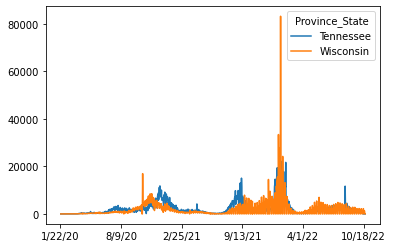

In [82]:
df_dailycases_by_state.transpose()[['Tennessee', 'Wisconsin']].plot()

In [83]:
df_dailycases_by_state.loc[['Tennessee', 'Texas']].iloc[:, 2:].rolling(window=3).mean()

#.rolling(window=3).mean()

,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3, center=False).mean()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,NaN,NaN
1/24/20,NaN,NaN
1/25/20,0.0,0.000000
1/26/20,0.0,0.000000
...,...,...
10/19/22,0.0,118.666667
10/20/22,0.0,118.666667
10/21/22,0.0,118.666667
10/22/22,0.0,0.000000


In [85]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].head()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


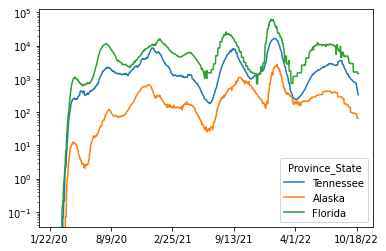

In [86]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska', 'Florida']].rolling(window=14).mean().plot(logy=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0b4592650>,
      dtype=object)

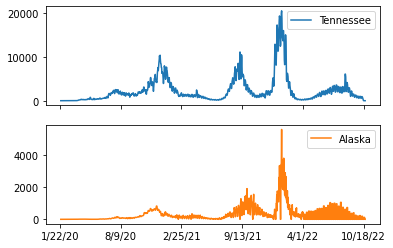

In [87]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3).mean().plot(subplots=True)

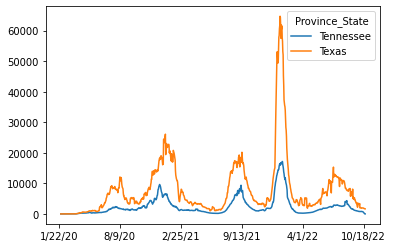

In [88]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].rolling(window=7).mean().plot()

In [89]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].head()

Province_State,Tennessee,Texas
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


# Part 6. Explore COVID-19 confirmed death data

In [90]:
fullpath_deathfile = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

df_death = pd.read_csv(fullpath1, error_bad_lines=False)
df_death.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,18452,18452,18452,18452,18452,18452,18480,18480,18480,18480
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,65819,65819,65819,65819,65819,65819,65895,65895,65895,65895
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6910,6910,6910,6910,6910,6910,6926,6926,6926,6926
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,7547,7547,7547,7547,7547,7547,7560,7560,7560,7560
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,17256,17256,17256,17256,17256,17256,17286,17286,17286,17286


In [91]:
df_death.columns[8:15]

Index(['Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20'],
      dtype='object')

In [92]:
df_death.set_index('Combined_Key', inplace=True)
df_death.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,18452,18452,18452,18452,18452,18452,18480,18480,18480,18480
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,65819,65819,65819,65819,65819,65819,65895,65895,65895,65895
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6910,6910,6910,6910,6910,6910,6926,6926,6926,6926
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,7547,7547,7547,7547,7547,7547,7560,7560,7560,7560
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,17256,17256,17256,17256,17256,17256,17286,17286,17286,17286


In [93]:
dfD_daily =  df_death.iloc[:,11:].diff(axis=1) #1 by columns
dfD_daily.head()

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,10/14/22,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,28,0,0,0
"Baldwin, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,76,0,0,0
"Barbour, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,0,0,0
"Bibb, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,0,0,0
"Blount, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,30,0,0,0


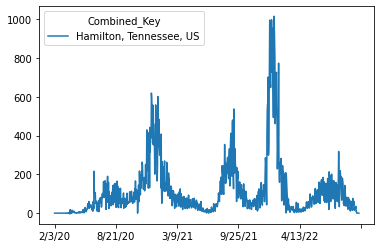

In [94]:
dfD_daily.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

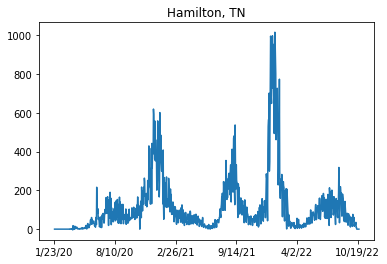

In [95]:
dfD_daily.loc['Hamilton, Tennessee, US', ].transpose().plot(title="Hamilton, TN")

#Part 7 Explore Global Data set

In [96]:

df2 = pd.read_csv(fullpath2, error_bad_lines=False)
df2.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/14/22', '10/15/22', '10/16/22', '10/17/22', '10/18/22', '10/19/22',
       '10/20/22', '10/21/22', '10/22/22', '10/23/22'],
      dtype='object', length=1010)

In [97]:
df2['Country/Region']
list(df2['Country/Region'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Biss

In [98]:
# Countries affected
countries = df2['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  201
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy Se

In [99]:
df2by_country = df2.iloc[:, 5:].groupby(df2['Country/Region']).sum().transpose()

In [100]:
df2by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,2,0,0,0,0,0


In [101]:
df2by_country.index = pd.to_datetime(df2by_country.index)

In [102]:
### Check if the dataframe contains NaN values
df2by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,2,0,0,0,0,0


In [103]:
  df2by_country.columns[ df2by_country.columns.str.contains('US') ]

Index(['US'], dtype='object', name='Country/Region')

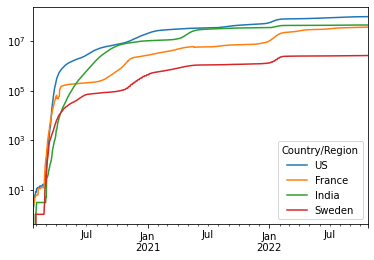

In [104]:
  df2by_country[['US', 'France', 'India', 'Sweden']].plot(logy=True)


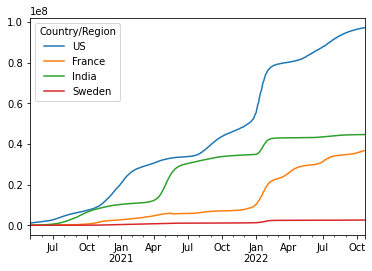

In [105]:
  df2by_country[['US', 'France', 'India', 'Sweden']]['2020-05-01':].plot(logy=False)

# Alternative approach to load data from GitHub

Go to GitHub, select the csv file,  select "view as raw",  and copy the URL. 

In [106]:
import pandas as pd

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

df = pd.read_csv(url)

In [107]:
df.head

<bound method NDFrame.head of            UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3337  84056039   US  USA    840  56039.0       Teton        Wyoming   
3338  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3339  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3340  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3341  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 10/14/22  10/15/22  10/16/22  \
0                US  32.539527  -86.6

In [108]:
? pd.read_csv()

Object ` pd.read_csv()` not found.


In [109]:
df2 = pd.read_csv(url, skiprows=5)
df2.head

<bound method NDFrame.head of       84001009  US  USA  840   1009.0      Blount  Alabama US.1  33.98210918  \
0     84001011  US  USA  840   1011.0     Bullock  Alabama   US    32.100305   
1     84001013  US  USA  840   1013.0      Butler  Alabama   US    31.753001   
2     84001015  US  USA  840   1015.0     Calhoun  Alabama   US    33.774837   
3     84001017  US  USA  840   1017.0    Chambers  Alabama   US    32.913601   
4     84001019  US  USA  840   1019.0    Cherokee  Alabama   US    34.178060   
...        ...  ..  ...  ...      ...         ...      ...  ...          ...   
3332  84056039  US  USA  840  56039.0       Teton  Wyoming   US    43.935225   
3333  84056041  US  USA  840  56041.0       Uinta  Wyoming   US    41.287818   
3334  84090056  US  USA  840  90056.0  Unassigned  Wyoming   US     0.000000   
3335  84056043  US  USA  840  56043.0    Washakie  Wyoming   US    43.904516   
3336  84056045  US  USA  840  56045.0      Weston  Wyoming   US    43.839612   

      -86